This is some interesting maths...

$\sum{}_{i=1}^{n} i = \frac{n(n+1)}{2}$

In [1]:
#imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from import_OMNI import read_OMNI
from entropy import H, MI, CMI

%matplotlib inline

In [26]:
def generate_hist(a, *args, bins=200):
    if args:
        nans = np.logical_or(np.isnan(a), np.isnan(args[0]))
        for arg in args[1:]:
            nans = np.logical_or(nans, np.isnan(arg))
        variables = []
        for _, arg in enumerate(args):
            variables.append(arg[~nans])
        a = a[~nans]
        n = np.histogramdd(np.array([a,*variables]).T, bins=bins)[0]
        n = n[n!=0]
        return n
    
    a = a[~np.isnan(a)]
    n = np.histogram(a, bins=bins)[0]
    n = n[n!=0]
    return n

def shannon_entropy(p_i):
    return -sum(p_i*np.log2(p_i))

def H(x, y=None, *z, conditional=False, bins=200):
    if y is None:
        a = generate_hist(x, bins=bins)
        p_a = a/sum(a)
        return shannon_entropy(p_a)

    if conditional:
        return H(x, y, bins=bins) - H(y, bins=bins)

    ab = generate_hist(x, y, *z, bins=bins)
    p_ab = ab/sum(ab)
    return shannon_entropy(p_ab)


def MI(x, y, bins=200):
    return H(x, bins=bins) + H(y, bins=bins) - H(x,y, bins=bins)

def CMI(x, y, z, bins=200):
    return H(x, z, bins=bins) + H(y, z, bins=bins) - H(x, y, z) - H(z)



In [22]:
df = read_OMNI(
    filepath="../datasets/test_AE_SYM_ASY_all.txt",
    formatpath="../data_format/test_AE_SYM_ASY_all_format.txt",
)
print(list(df))


c:\Users\Aarnav\Downloads\UROP2024\UROP2024\src\import_OMNI.py:39: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df = pd.read_csv(


<class 'pandas.core.frame.DataFrame'>
['Datetime', 'Field', 'BZ', 'AE-index', 'SYM/D', 'SYM/H', 'ASY/D', 'ASY/H']


c:\Users\Aarnav\.conda\envs\UROP2024\Lib\site-packages\matplotlib\axes\_axes.py:6834: RuntimeWarning: All-NaN slice encountered
  xmin = min(xmin, np.nanmin(xi))
c:\Users\Aarnav\.conda\envs\UROP2024\Lib\site-packages\matplotlib\axes\_axes.py:6835: RuntimeWarning: All-NaN slice encountered
  xmax = max(xmax, np.nanmax(xi))


ValueError: autodetected range of [nan, nan] is not finite

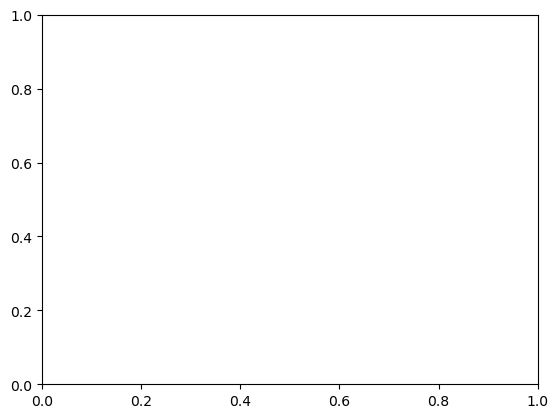

In [33]:
for column in list(df)[1:]:
    plt.plot(df["Datetime"], df[column], label=column)
plt.plot(df["Datetime"], df["BZ"], label="BZ")
plt.plot(df["Datetime"], df["SYM/H"], label="SYM/H")
plt.hist(df["SYM/H"], 150)
plt.legend()
plt.show()

In [24]:
def entropy_matrix(df, bins=200):
    columns = list(df)
    matrix = []
    for _, column_1 in enumerate(columns):
        if column_1 == "Datetime":
            continue
        row = []
        for __, column_2 in enumerate(columns):
            if column_2 == "Datetime":
                continue
            row.append(MI(df[column_1], df[column_2], bins=bins))
        matrix.append(row)
    return np.array(matrix)

In [32]:
entropy_matrix(entropy_matrix(df))

True
['Datetime', 'Field', 'BZ', 'AE-index', 'SYM/D', 'SYM/H', 'ASY/D', 'ASY/H']
Field Field 5.539569070477692 5.539569070477692
Field BZ 0.4630201609159883 
Field AE-index 5.539569070477692 
Field SYM/D 0.10639236259322615 
Field SYM/H 0.21282715641060435 
Field ASY/D 0.15101165686933982 
Field ASY/H 0.18986730546599162 
BZ Field 0.4630201609162654 
BZ BZ 5.4532225123006155 5.4532225123006155
BZ AE-index 5.4532225123006155 
BZ SYM/D 0.0842485776384958 
BZ SYM/H 0.12947651656570613 
BZ ASY/D 0.12172626837405431 
BZ ASY/H 0.15296825166398165 
AE-index Field 5.539569070477692 
AE-index BZ 5.4532225123006155 
AE-index AE-index 0 0
AE-index SYM/D 3.7503276747849217 
AE-index SYM/H 5.483931226107532 
AE-index ASY/D 4.867695049336769 
AE-index ASY/H 5.122914783985516 
SYM/D Field 0.1063923625933203 
SYM/D BZ 0.08424857763848337 
SYM/D AE-index 3.7503276747849217 
SYM/D SYM/D 3.7503276747849217 3.7503276747849217
SYM/D SYM/H 0.1541247336386551 
SYM/D ASY/D 0.13763304023468592 
SYM/D ASY/H 0.1

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()